<a href="https://colab.research.google.com/github/IshaIndhu/Fighting-the-Covid-Infodemic/blob/main/ML_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for Machine Learning**
## **Covid-19 Infodemic(Arabic)**

CB.EN.U4AIE19025  -   Dinesh.S

CB.EN.U4AIE19030  -   Isha Indhu.S


CB.EN.U4AIE19037  -   Kavya S. Kumar


CB.EN.U4AIE19071  -   Roshan Tushar.S

In [ ]:
# installing camel tools as it is an open source toolkit for Arabic NLP(Natural Language prcessing)
! pip install camel-tools

     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 778kB 33.6MB/s 
     |████████████████████████████████| 256kB 44.1MB/s 
     |████████████████████████████████| 901kB 37.7MB/s 
     |████████████████████████████████| 3.0MB 36.4MB/s 
     |████████████████████████████████| 1.2MB 28.7MB/s 
  Created wheel for camel-tools: filename=camel_tools-1.1.0-cp37-none-any.whl size=96899 sha256=380e6ea8e53c059aafc656e08fe8afc4ac45ed5efa36474ac4805a10d72d9171
  Stored in directory: /root/.cache/pip/wheels/ff/8d/46/949198daef42f9e3bf64ed645a4af05816f47aa7677ac74589
  Created wheel for camel-kenlm: filename=camel_kenlm-2020.11.2-cp37-cp37m-linux_x86_64.whl size=2311345 sha256=9e203740ee80b31cdbdaadc57a3259db7a8fd26ddb71f5b41e422a322c1c1dac
  Stored in directory: /root/.cache/pip/wheels/a4/df/36/46723b5cb1a11c345ad10813f13d2ce2452e95b0aaca7ad332
Successfully built camel-tools camel-kenlm


In [ ]:
from camel_tools.tokenizers import word       # To tokenize a word in Arabic we are importing word from camel_tools.tokenizers. 
import pandas as pd                           # We use pandas as it is easy to use data structutres and data analysis tools for python language
import re                                     # We are importing re to indicate special forms or to allow special characters 
from sklearn.feature_extraction.text import TfidfVectorizer
                                              # TF-IDF stands for “Term Frequency — Inverse Document Frequency”.
                                              # TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents
from sklearn.decomposition import TruncatedSVD# Here we importing TruncatedSVD to reduce dimensionality
import numpy as np                            # We use numpy as it contains many mathematical operations,multidimensional array etc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Train Data

**Reading Data**

In [ ]:
# read_csv is an pandas function it is to read csv files and do operations on it1
df = pd.read_csv("/content/covid19_disinfo_binary_arabic_train.tsv",sep="\t")

FileNotFoundError: ignored

**Displaying Data**


In [ ]:
df.head()

In [ ]:
df.describe()

## **Preprocessing**


1.   Removing non Arabic and special characters. 
2.   Tokenising the tweets.
3.   Removing stop words(insignificant Arabic words)


In [ ]:
# we are creating a function called clean data.In this we are passing parameters tweets and stops.
# We have created this function to remove english text,punctuation and numbers.

def clean_data(tweets,stops):
  tweet_after_cleaning=[]
  for tweet in tweets:
    tweet = re.sub(r"['A-Za-z0-9'\W+''_']+"," ", tweet)
    tweet_tokens=word.simple_word_tokenize(tweet) # tokenizing the tweets
    temp=[]
    for tweet_token in tweet_tokens:
      if not tweet_token in stops:
        temp.append(tweet_token)
        
    tweet = " ".join(temp)
   
    tweet_after_cleaning.append(tweet)


  return tweet_after_cleaning

    


In [ ]:
# It is a pandas function to turn a HTML table into pandas dataframes.
url = 'https://1000mostcommonwords.com/1000-most-common-arabic-words/'
df1 = pd.read_html(url)

In [ ]:
#We are converting to list and toring it in variable stops 
stops = df1[0][1].tolist()


In [ ]:
#We are removing the header word Arabic as it is in english
stops.remove("Arabic")
# We are appending "COVIDー" and "Covid as most common words
stops.append("COVIDー")
stops.append("Covid")


In [ ]:
#We are printing the most common arabic words and its meaning in english in the table
print("Most Common Arabic Words\n",df1)

In [ ]:
#calling the function clean_data
clean_tweets=clean_data(df['text'],stops)#To improve the data quality we are cleaning the data


## **Processing** 
 1.   Tf-Idf Vectorization
 2.   Performing SVD to reduce matrix dimension
 3.   Label Encoding 


**Tf-Idf** 
  
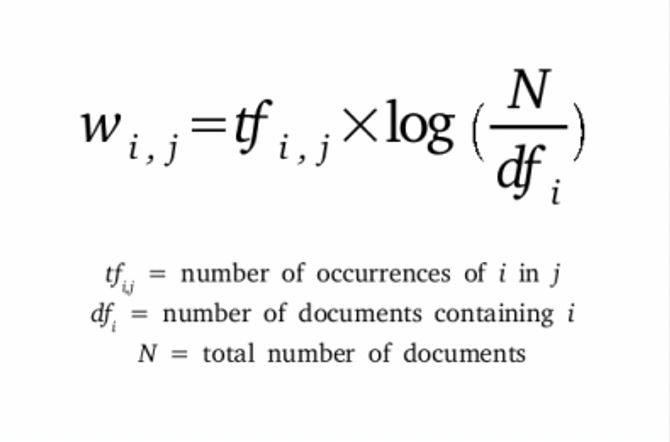


**Truncated SVD**

Till now, we saw that singular value decomposition breaks any matrix A down so that A = U*Sigmal*V^T.

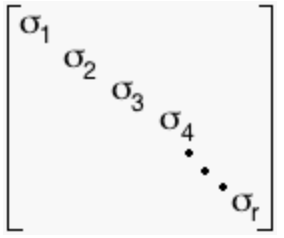

Where,

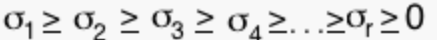

are the singular values of the matrix A with rank r.


We can find truncated SVD to A by setting all but the first k largest singular values equal to zero and using only the first k columns of U and V.

In [ ]:
def processing(clean_tweets):
  tv = TfidfVectorizer(stop_words='english')            #TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents
  tv_score = tv.fit_transform(clean_tweets)             # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
  print("Shape of TF-IDF matrix :",np.shape(tv_score))
                                                        # We used TruncatedSVD which is different from normal svd.
                                                        # Because Svd will produce matrix with n coloumns where truncated SVD will produce matrices with the specified number of columns.
  svd = TruncatedSVD(n_components=20, random_state=42)                    
  X = svd.fit_transform(tv_score)                       # fit_transform() is used to scale the data
  print("Shape of TF-IDF matrix after performing SVD :",np.shape(X)) #shape of the matrix after reduction
  return X 


In [ ]:
df=df.replace(np.nan, -1)   # replacing Nan values with -1
df=df.replace('yes',1)      # replacing Yes values with 1 
df=df.replace('no', 0)      # replacing No values with 0

In [ ]:
y =df[['q1_label','q2_label','q3_label','q4_label','q5_label','q6_label','q7_label']] # selecting columns with label values
X=processing(clean_tweets)                                                            # Processing - to get tf-idf matrix and reduce the dimension


# **Classification Algorithms**

## ***Decision Tree Classifier***

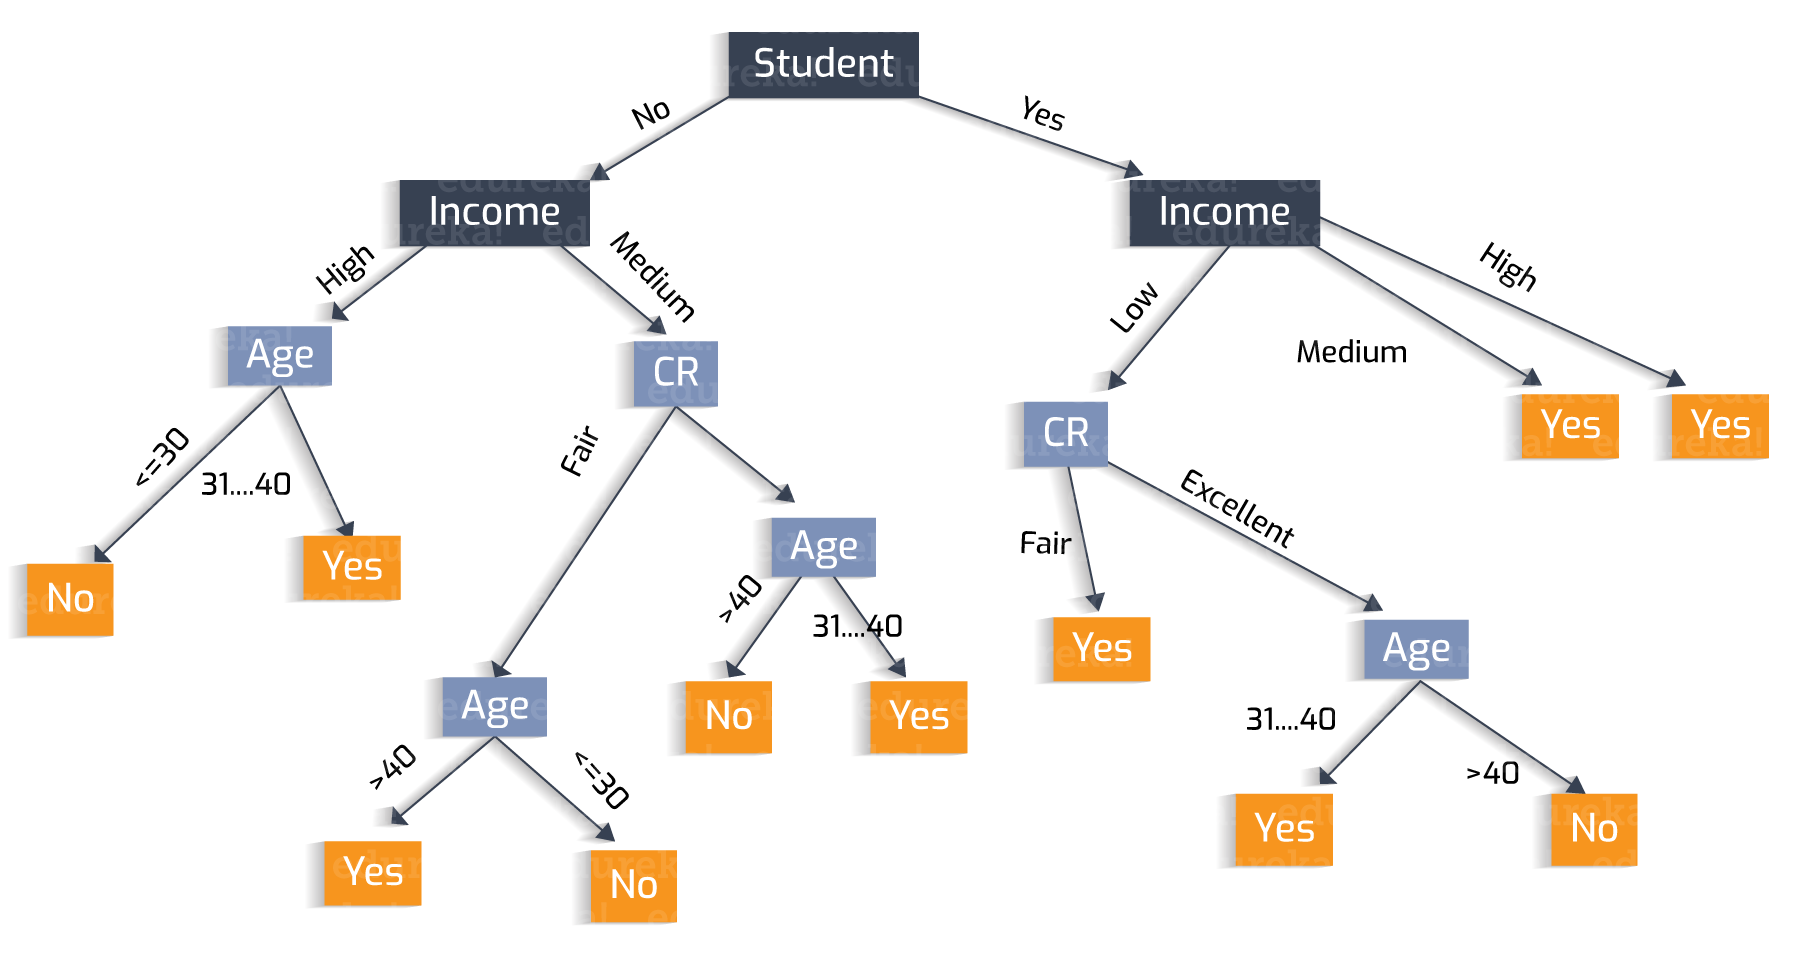


    
A decision tree is a flow-chart like structure in which nodes represent conditions based on certain parameters on attributes of the data. Each branch represents the result or output of the condition. It is a supervised machine learning algorithm. 

**ID3 Algorithm:**

ID3 is an iterative algorithm used for nominal data. ID3 stands for Iterative Dichotomiser 3, since it iteratively divides the data into groups at each step.

**Metrics In ID3:**

**Entropy:**

Entropy is the measure of disorder or uncertainty shown by a feature in the dataset. Higher the entropy greater the disorder or lesser the purity of the node. The mathematical formula of Entropy is given as follows: 

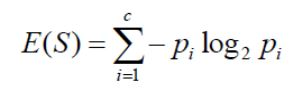 

where,
c is the total number of classes in the target column, pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.

**Information Gain:**

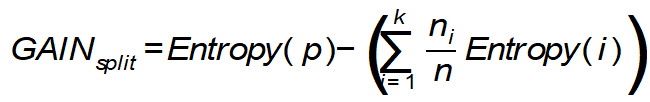

Steps to split a decision tree using Information Gain:

For each split, individually calculate the entropy of each child node

1.   The entropy of each split is calculated as the weighted average entropy of child nodes
2.   The split with the lowest entropy or highest information gain is selected.
3.   Until homogeneous nodes are achieved, steps 1-3 are repeated. 


**Gini Index:**

Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.
Mathematically, the GINI Index is calculated as, 
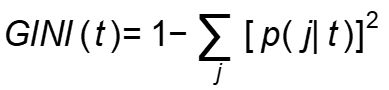

 pj|t is the relative frequency of class ‘j’ at node t






**Random Forest**

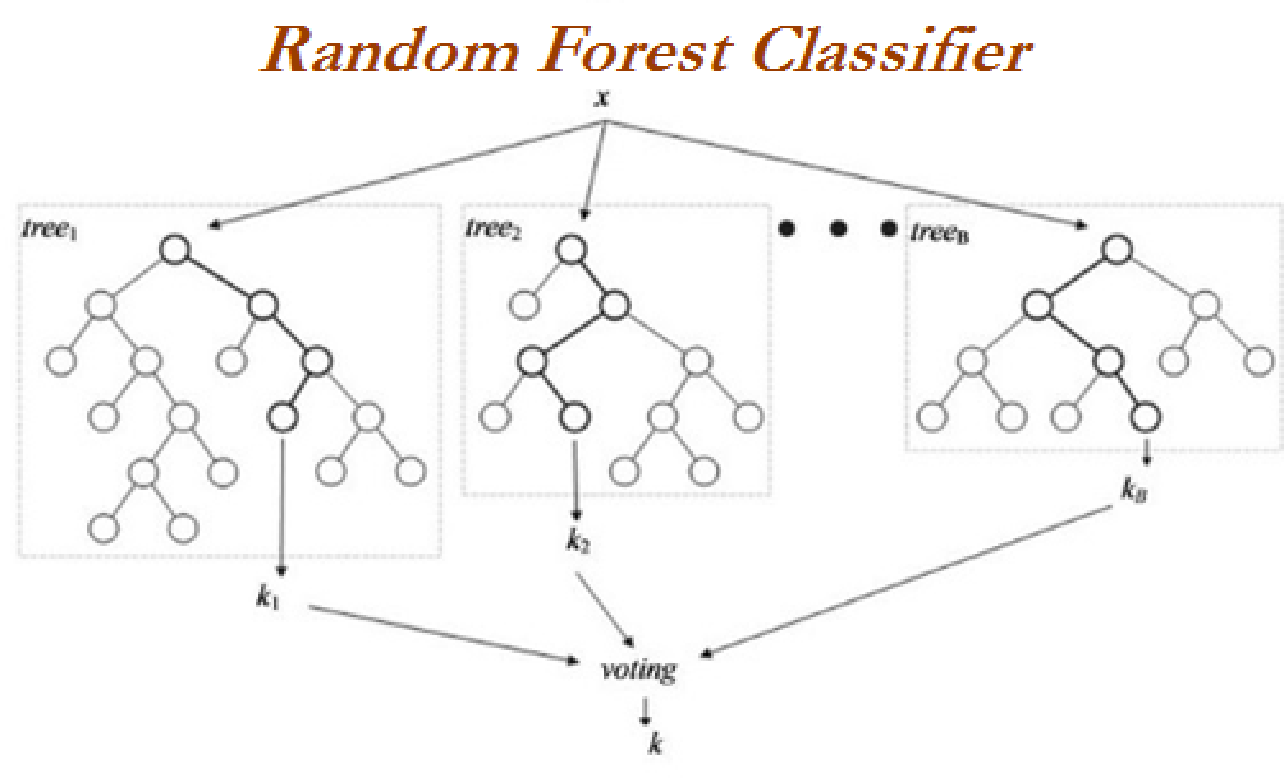



## ***Naive Bayes Classifier***


  Naive Bayes Classification algorithm is based on Bayes’ Theorem. It works on the assumption that every pair of features being classified is independent of each other.

 Bayes' Theorem is mathematically stated as follows:

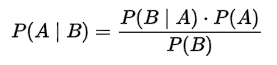

where   

  *  A,B - events
  *  P(A|B) - Probablity of A given B is true
  *  P(B|A) - Probablity of B given A is true
  *  P(A), P(B) - Independent Probablities of A and B     



   We know that usually, we require the model to predict the class label of the new data set given the feature values is the n feature values). Therefore the above formula becomes :
  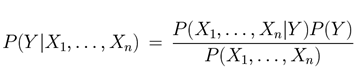

where   

  *  y -class labels, X = (x1,x2,...xn) - n feature values 
  *  P(y|X) - Posterior Probablity - probablity of class label given the   feature values
  *  P(X|y) - Likelihood - probablity of feature values given the class label
  *  P(y) - Prior probablity of class label

  Intitally we had assumed that every feature is independent of each other therefore the formula for the Likelihood can be written as:

  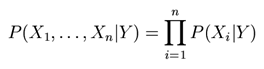
  
  For numerical data:

 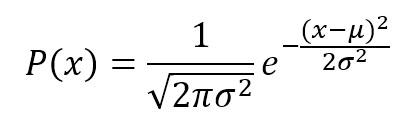
 

## ***SVM***

“Support Vector Machine” (SVM) is a supervised machine learning algorithm. SVM trains on a set of labelled data and builds a model to then classifies any new input data depending on what it learned in the training phase.  

It can be used for both classification or regression challenges. But it is mostly used in classification problems.  

There are two types in SVM. Linear and non-linear. 

This algorithm generally finds a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points
        
Support Vector Machine (the “road machine”) is responsible for finding the decision boundary to separate different classes and maximize the margin.

Advantages:
	
*   Accuracy
*   Works very well with limited datasets.



Disadvantages:
*   Does not work well with larger datasets
*   Sometimes, training time with SVMs can be high



A hard margin means that an SVM is very rigid in classification and tries to work extremely well in the training set, causing overfitting.

Soft margin is also called as noisy linear SVM which includes some miss-classified points. Solution to the soft margin is approximation of points which are miss-classified in linear decision boundary.
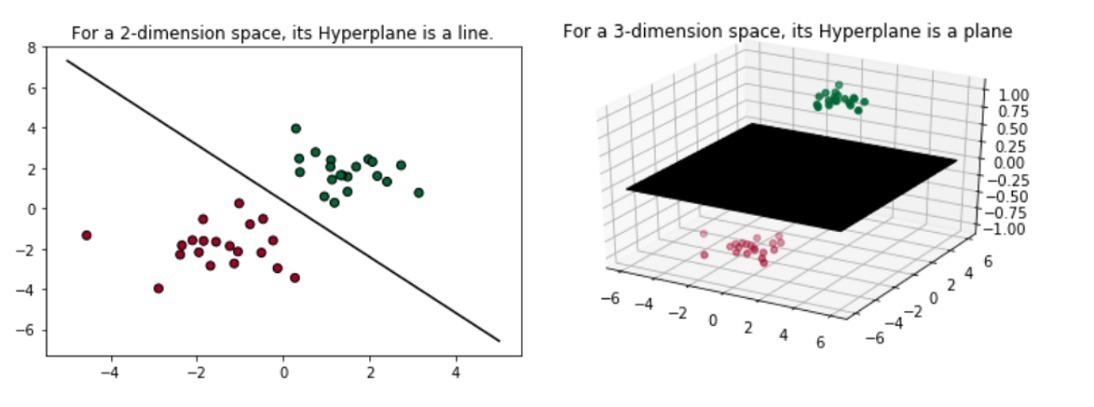


In [ ]:
X=processing(clean_tweets)       # returns TF-IDF reduced matrix of train data

### **Confusion Matrix**

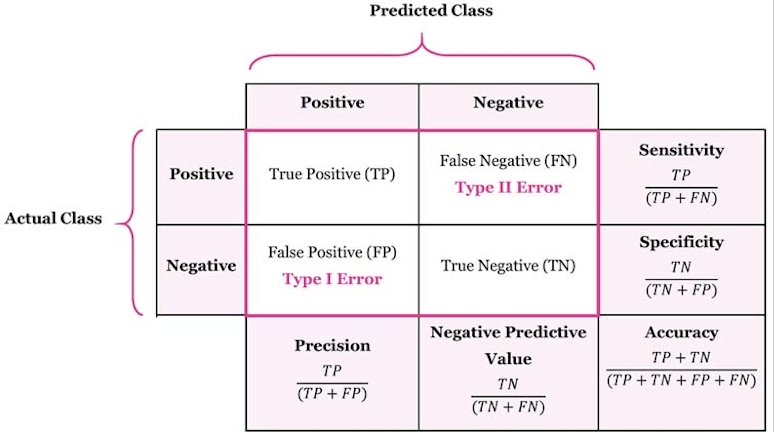



# **Training Models**

We have used:
1.   Decision tree 
2.   Random Forest
3.   Naive Bayes 
4.   SVM


## Function **model_train**

Since there are 7 labels for each of the tweets, the classification is done seperately. 

For each of the label:

* It prints the confusion matrix.
* It prints the classification report.
* It picks the classifier with the best accuracy score.





In [ ]:
# initialising the classifiers
                       
rfc1 = tree.DecisionTreeClassifier()
clf1 = RandomForestClassifier()
rfc2 = GaussianNB()
clf2 = svm.SVC(kernel = 'rbf')

# funciton model_train takes data and class labels as parameters 

def model_train(X,y): 
  acc = []
  names = ["Decision Tree","Random Forest", "Naive Bayes", "SVM"]
  classifiers = []
  classes = []
  Accuracy_labels=[]

  
  for i in range(len(y.columns)):
    Acc_model = 0
    print('\n''---------------------- ',y.columns[i], '----------------------''\n')

    y_train = y.iloc[:,i].to_list()
    X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.33, random_state=42)
    print(np.shape(X_test))

    
    rfc1.fit(X_train,y_train)
    y1=rfc1.predict(X_test)
    print("\nDecisionTreeClassifier\n",classification_report(y_test, y1))
    #print(accuracy_score(y_test,y1))
    Acc = accuracy_score(y_test,y1)
    print("Confusion Matrix\n",confusion_matrix(y_test, y1))
    acc.append(Acc)
    classes.append(y.columns[i])
    classifiers.append(names[0])

    
    clf1.fit(X_train,y_train)
    y2=clf1.predict(X_test)
    print("\nRandom Forest Classifier \n",classification_report(y_test, y2))
    #print(accuracy_score(y_test,y2))
    x=accuracy_score(y_test,y2)
    acc.append(x)
    classes.append(y.columns[i])
    classifiers.append(names[1])
    if(x>Acc):
      Acc=x
      Acc_model = 1
    print("Confusion Matrix\n",confusion_matrix(y_test, y2))

    
    rfc2.fit(X_train,y_train)
    y3=rfc2.predict(X_test)
    print("\n GaussianNB\n",classification_report(y_test, y3))
    #print(accuracy_score(y_test,y3))
    x=accuracy_score(y_test,y3)
    acc.append(x)
    classes.append(y.columns[i])
    classifiers.append(names[2])
    if(x>Acc):
      Acc=x
      Acc_model = 2
    print("Confusion Matrix\n",confusion_matrix(y_test, y3))
  
    
    clf2.fit(X_train,y_train)
    y4=clf2.predict(X_test)
    print("\nSVM\n",classification_report(y_test, y4))
    #print(accuracy_score(y_test,y4))
    x=accuracy_score(y_test,y4)
    acc.append(x)
    classes.append(y.columns[i])
    classifiers.append(names[3])
    if(x>Acc):
      Acc=x
      Acc_model = 3
    print("Confusion Matrix\n",confusion_matrix(y_test, y4))

    Accuracy_labels.append(Acc_model)
  return acc,Accuracy_labels,classifiers,classes

In [ ]:
acc,Acc_Labels,classifiers, labels = model_train(X,y)
print(Acc_Labels)
#print(classifiers)
#print(labels)

## **Plotting the Accuracies** 

Performance of each classifier for each of the labels

In [ ]:
graph = pd.DataFrame([labels, classifiers, acc]).T
graph.columns = ['Labels', 'Classifiers', 'Accuracy']
graph.set_index(['Labels', 'Classifiers'], inplace=True)
graph.unstack().plot.bar(figsize=(15,10))
plt.legend(loc = 'lower right')
plt.title("COMPARISON OF ACCURACIES OF VARIOUS CLASSIFIERS WHEN NAN IS A CLASS", fontsize = 15)


### **Function to remove NaN class**

In [ ]:
def replace_nan_predict(df,label):
  #To improve the data quality we are cleaning the data
  newdf=df.replace(np.nan, -1)
  newdf=newdf.replace('yes',1)
  newdf=newdf.replace('no', 0)
  for i in range(len(newdf[label])):
      if(newdf[label][i] == -1):
          newdf = newdf.drop([i])

  clean_tweets=clean_data(newdf['text'],stops)
  X=processing(clean_tweets)
  acc,acc_Labels1,classifiers,labels = model_train(X,newdf[[label]])
  return acc,acc_Labels1,classifiers,labels

In [ ]:
accf = []
classf = []
labelf = []
Acc_labels_test1=[]
for i in range(1,8):
  name = 'q'+str(i)+'_label'
  acci,Acc_labels_test,classi,labelsi = replace_nan_predict(df,name) #calling the function to remove NaN and predict.
  accf = accf+acci
  classf = classf+classi
  labelf = labelf+labelsi
  Acc_labels_test1=Acc_labels_test1+Acc_labels_test

In [ ]:
print(Acc_labels_test1) # returns the best classifier number for each of the labels

**Plotting after removal of NaN**

In [ ]:
graph = pd.DataFrame([labelf, classf, accf]).T
graph.columns = ['Labels', 'Classifiers', 'Accuracy']
graph.set_index(['Labels', 'Classifiers'], inplace=True)
graph.unstack().plot.bar(figsize=(15,10))
plt.legend(loc='lower right')
plt.title("COMPARISON OF ACCURACIES OF VARIOUS CLASSIFIERS WHEN NAN IS NOT A CLASS", fontsize = 15)


## Test Data
**Reading test data**



In [ ]:
df3 =  pd.read_csv("/content/covid19_disinfo_binary_arabic_dev.tsv",sep="\t")

In [ ]:
df3.head() # displaying the tweets

**Cleaning test data and Processing**

In [ ]:
tweets_test=df3['text']                     
clean_test1=clean_data(tweets_test,stops) 

In [ ]:
X_test1 = processing(clean_test1) 
np.shape(X_test1)

# Predicting Class Labels

 Predicting the Class Labels for the test data based on the best classifier
 (High Accuracy)


In [ ]:
Y= []
for j in range(len(Acc_Labels)):
  i=Acc_Labels[j]
  k=0
  y_train = y.iloc[:,j].to_list()
  X_train = X
  if(i==0):
    rfc1.fit(X_train,y_train)
    Y_1 = rfc1.predict(X_test1)
  elif(i==1):
    clf1.fit(X_train,y_train)
    Y_1 = clf1.predict(X_test1)
  elif(i==2):
    rfc2.fit(X_train,y_train)
    Y_1 = rfc2.predict(X_test1)
  else:
    clf2.fit(X_train,y_train)
    Y_1 = clf2.predict(X_test1)
  Y.append(Y_1)
  k=k+1


Comparing the prediction results with the actual class values.

In [ ]:
predicted=np.array(Y).T
df3 = pd.read_csv("/content/baseline.txt",sep="\t",header=None)

In [ ]:
df3

In [ ]:
df3=df3.replace(np.nan, -1)   # replacing Nan values with -1
df3=df3.replace('yes',1)      # replacing Yes values with 1 
df3=df3.replace('no', 0)      # replacing No values with 0

In [ ]:
y_actual=df3.to_numpy() # dataframe to array 
check=np.equal(y_actual,predicted) # comparing the results

# **Final Result Analysis**

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
  
# Creating dataset 
prediction_label = ['False','True' ] 
explode = (0, 0.1)  # only "explode" the 2nd slice 

data = [np.shape(check)[1]*np.shape(check)[0]-sum(sum(check)),sum(sum(check))] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, explode=explode, labels = prediction_label,autopct='%1.1f%%',shadow=True, startangle=90) 
plt.title("Representation of reliability of the Prediction")
# show plot 
plt.show() 

In [ ]:
Total_true=sum(check)
Total_false=np.repeat((np.shape(check)[0]),np.shape(Total_true)[0])-Total_true
Total=list(Total_true)+list(Total_false)
Label=['True']*7+['False']*7
classf=['q1_label','q2_label','q3_label','q4_label','q5_label','q6_label','q7_label']*2

In [ ]:
graph = pd.DataFrame([Label, classf, Total]).T
graph.columns = ['Labels', 'Classifiers', 'Prediction']
graph.set_index(['Classifiers','Labels'], inplace=True)
graph.unstack().plot.bar(figsize=(15,10))
plt.legend(loc='lower right')
plt.title("Test data Prediction for each class label", fontsize = 15)


# **Inferences**


*   The performance of this model greatly depends on the quantity of labeled data.

*  The prediction of q5_label stands as proof for the above point, since the training data was skewed towards one class.

* It is also observed that the accuracy of the prediction increased significantly after removing NaN class values from the training data.

* Since each of the labels had diverse distribution, the best classifier for each of the class labels were different.

* Since the number of instances of test data is very less and therefore the columns in truncated SVD are also less.

